In [3]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score

data = pd.read_csv('/kaggle/input/email-spam-classification-dataset-csv/emails.csv')

data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
y = data['Prediction'].astype(int)
X = data.drop(columns=['Prediction', 'Email No.'])

print("Done")

Done


In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42, stratify = y)

In [6]:
model = Pipeline([('scaler', MaxAbsScaler()), ('clf', LogisticRegression(max_iter = 2000, solver = 'liblinear', class_weight = 'balanced'))])

In [7]:
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_val)[:, 1]
print("PR-AUC:", average_precision_score(y_val, y_prob))

y_pred = model.predict(X_val)
print("Classification:",)
print(classification_report(y_val, y_pred, digits = 4))


PR-AUC: 0.9687009229571049
Classification:
              precision    recall  f1-score   support

           0     0.9929    0.9456    0.9686       735
           1     0.8806    0.9833    0.9291       300

    accuracy                         0.9565      1035
   macro avg     0.9367    0.9645    0.9489      1035
weighted avg     0.9603    0.9565    0.9572      1035



Confusion Matrix:  [[695  40]
 [  5 295]]


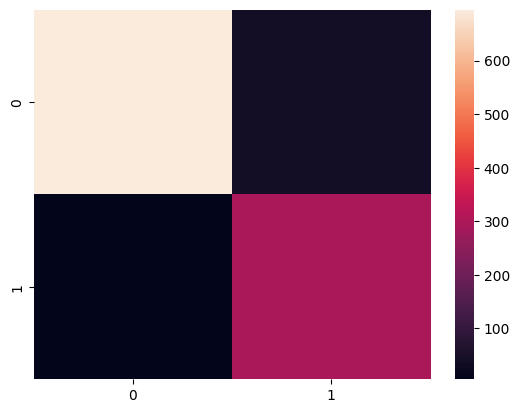

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred, labels = [0,1])
print("Confusion Matrix: ", cm)

sns.heatmap(cm)
plt.show()

In [9]:
results = pd.DataFrame({"prob_spam": y_prob, "true": y_val.values})
print("Top 10 Spammy Email Predictions")
print(results.sort_values("prob_spam", ascending=False).head(10)) #here sorts the predictions in decending order from most spammy to likely not spammy

Top 10 Spammy Email Predictions
      prob_spam  true
1014   1.000000     1
182    0.999991     1
394    0.999987     1
927    0.999967     1
615    0.999946     1
597    0.999943     1
376    0.999930     1
612    0.999921     1
430    0.999921     1
282    0.999920     1


In [10]:
# REAL WORLD USE
import re

# The exact feature names the model expects (from your training data)
feature_cols = X.columns

def score_email(email_text: str):
    # basic tokenization: lowercase + words only
    tokens = re.findall(r"[a-z]+", email_text.lower())
    counts = pd.Series(tokens).value_counts()

    # build a single-row DataFrame with the same columns as training
    row = pd.DataFrame(0, index=[0], columns=feature_cols)

    # fill in word counts for words that exist in our training vocabulary
    for word, c in counts.items():
        if word in row.columns:
            row.at[0, word] = int(c)

    prob_spam = model.predict_proba(row)[0, 1]
    pred = int(prob_spam >= 0.5)
    return prob_spam, pred

In [12]:
email = input("Enter the email details: ")
prob, pred = score_email(email)
print("Spam probability: ", prob)
print("Prediction: ", "SPAM" if pred == 1 else "NOT SPAM")

Enter the email details:  "Subject: Congratulations - you have been selected! You have won a free gift card! Click the link to claim the reward today."


Spam probability:  0.6299192084740477
Prediction:  SPAM
